<a href="https://colab.research.google.com/github/suadamohammed/noise_classifier/blob/main/simple_ae_paper_ipynbcient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from keras.layers import Dense, Flatten,Conv2D,Add,Conv2DTranspose,UpSampling2D,Concatenate,Input,Lambda,Reshape,BatchNormalization,MaxPooling2D,Dropout
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
import pickle
from keras.models import Sequential, Model
from keras.layers import Conv2D,Concatenate
import os

from keras import losses
from sklearn.model_selection import train_test_split
from skimage import metrics
#import tensorflow.keras.applications.EfficientNetB0
from keras.applications import EfficientNetB0
from skimage.filters import median
from keras.utils import plot_model
from keras import backend as K
from keras.applications.vgg16 import VGG16
from math import log10, sqrt

In [ ]:



from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten,Conv2D,Conv2DTranspose,UpSampling2D,Concatenate,Input,Add,Lambda,Reshape
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
import pickle
from tensorflow.keras.models import Sequential, Model
import os
from sklearn.model_selection import train_test_split
from skimage import metrics
from skimage.filters import median
#from tensorflow.keras.utils import plot_model

"""from google.colab import drive
drive.mount('/content/drive')"""


import cv2
import numpy as np

img_spec_x=128
img_spec_y=128

no_images=20
no_epocs=100
no_batch=16

np.random.seed(42)
tf.random.set_seed(42)



In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title
#radar data

x_path = '/content/drive/MyDrive/denoising_final_dataset/0_percent/noisy_1c'
y_path = '/content/drive/MyDrive/denoising_final_dataset/0_percent/clean_1c'


"""y_path = '/content/drive/MyDrive/demonising_radar/dataset/clean_1c_final'"""

"""x_path = '/content/drive/MyDrive/demonising_radar/small_dataset/noisy_1c_final'
y_path = '/content/drive/MyDrive/demonising_radar/small_dataset/clean_1c_final'"""

"""#denoising documents data

x_path = '/content/drive/MyDrive/demonising_radar/Denoising Dirty Document/train'
y_path = '/content/drive/MyDrive/demonising_radar/Denoising Dirty Document/train_cleaned'
"""

"""#set 12 data

y_path ='/content/drive/MyDrive/demonising_radar/set12-dataset'
"""

"""
#berkeley

y_path ='/content/drive/MyDrive/demonising_radar/berkley-dataset'
"""


In [ ]:
def crop_images(img):
  height, width = img.shape

  # Calculate the coordinates of the top-left corner of the region you want to crop
  x = int((width - 128) / 2)
  y = int((height - 128) / 2)

  # Crop the region
  crop_img = img[y:y+128, x:x+128]
  return crop_img


tf.config.run_functions_eagerly(True)

import numpy as np
import time

def add_speckle_noise_test(image, sigma):
    """Adds speckle noise to an image.

    Args:
        image: A NumPy array containing the image.
        sigma: The standard deviation of the speckle noise.

    Returns:
        A NumPy array containing the noisy image.
    """

    # Set a random seed based on the current time
    np.random.seed(int(time.time()))

    # Generate a random Gaussian noise array with the same shape as the image.
    noise = np.random.normal(0, sigma, image.shape)

    # Multiply the noise array by the image to add speckle noise to the image.
    noisy_image = image + image * noise

    return noisy_image





code block if we have only clean images

In [ ]:

y_path = '/content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c'



i=0
X=[]

noisy_images=[]
clean_images=[]

print('Loading Images...')
sorted_files = sorted(os.listdir(y_path))

for each_file in sorted_files[:400]:
  if os.path.exists(os.path.join(y_path, each_file)) :

    print("path++++++++++++++++++",os.path.join(y_path, each_file))
    y_img = cv2.imread(os.path.join(y_path, each_file), 0)
    #y_img=cv2.resize(y_img,(img_spec_x,img_spec_x))
    #print(y_img.shape)

    y_img =crop_images(y_img)
    img = add_speckle_noise_test(y_img,.05)
    X.append(img)
    clean_images.append(y_img)


    img = add_speckle_noise_test(y_img,.07)
    X.append(img)
    clean_images.append(y_img)


    img = add_speckle_noise_test(y_img,.09)
    X.append(img)
    clean_images.append(y_img)


    img = add_speckle_noise_test(y_img,.1)
    X.append(img)
    clean_images.append(y_img)





print('.....Complete....')





Loading Images...
path++++++++++++++++++ /content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00071.jpg
path++++++++++++++++++ /content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00072.jpg
path++++++++++++++++++ /content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00073.jpg
path++++++++++++++++++ /content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00074.jpg
path++++++++++++++++++ /content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00075.jpg
path++++++++++++++++++ /content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00076.jpg
path++++++++++++++++++ /content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00077.jpg
path++++++++++++++++++ /content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00078.jpg
path++++++++++++++++++ /content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c/00079.jpg
path++++++++++++++++++ /content/drive/MyDrive/denoising_final_dataset/10_percent/c

In [ ]:

X=np.array(X)/255
clean_images = np.array(clean_images)/255
print(X.shape)
print(clean_images.shape)

(1600, 128, 128)
(1600, 128, 128)


In [ ]:
noisy_train, noisy_test, clean_train, clean_test = train_test_split(X, clean_images, test_size=0.3, random_state=42)
noisy_train, noisy_val, clean_train, clean_val = train_test_split(noisy_train, clean_train, test_size=0.3, random_state=42)

In [ ]:
# @title


from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten,Conv2D,Conv2DTranspose,UpSampling2D,Concatenate,Input,Add,Lambda,Reshape
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
import pickle
from tensorflow.keras.models import Sequential, Model
import os
from sklearn.model_selection import train_test_split
from skimage import metrics
from skimage.filters import median
#from tensorflow.keras.utils import plot_model

"""from google.colab import drive
drive.mount('/content/drive')"""


import cv2
import numpy as np

img_spec_x=128
img_spec_y=128
no_images=20
no_epocs=100
no_batch=16

np.random.seed(42)
tf.random.set_seed(42)


i=0
X=[]

noisy_images=[]
clean_images=[]

print('Loading Images...')

for each_file in os.listdir(x_path)[:]:
  row=[]
  print("path++++++++++++++++++",os.path.join(x_path, each_file))
  img = cv2.imread(os.path.join(x_path, each_file), 0)
  img=crop_images(img)
  #img=img =cv2.resize(img, (img_spec_x, img_spec_y))
  #cropped=crop_images(img)




  y_img = cv2.imread(os.path.join(y_path, each_file), 0)
  y_img=crop_images(y_img)

  #y_img =cv2.resize(y_img, (img_spec_x, img_spec_y))

  #img =cv2.resize(img, (img_spec, img_spec))
  #cropped1=crop_images(y_img)

  X.append(img)

  clean_images.append(y_img)

print('.....Complete....')




#X=np.array(X)/255
#X = np.stack((X,)*3, axis=-1)
#clean_images = np.stack((clean_images,)*3, axis=-1)
"""
X = np.reshape(X,(-1,3,img_spec,img_spec,1))
clean_images = np.reshape(clean_images,(-1,img_spec,img_spec,1))"""

#clean_images = np.array(clean_images)/255
print(len(X))
print(len(clean_images))



#noisy_train, noisy_test, clean_train, clean_test = train_test_split(X, clean_images, test_size=0.3, random_state=42)

In [ ]:
# @title
x_path = '/content/drive/MyDrive/denoising_final_dataset/10_percent/noisy_1c'
y_path = '/content/drive/MyDrive/denoising_final_dataset/10_percent/clean_1c'

sorted_files = sorted(os.listdir(x_path))

for each_file in sorted_files[:300]:
  row=[]
  print("path++++++++++++++++++",os.path.join(x_path, each_file))
  img = cv2.imread(os.path.join(x_path, each_file), 0)
  img=crop_images(img)
  #img=img =cv2.resize(img, (img_spec_x, img_spec_y))
  #cropped=crop_images(img)




  y_img = cv2.imread(os.path.join(y_path, each_file), 0)
  y_img=crop_images(y_img)

  #y_img =cv2.resize(y_img, (img_spec_x, img_spec_y))

  #img =cv2.resize(img, (img_spec, img_spec))
  #cropped1=crop_images(y_img)

  X.append(img)

  clean_images.append(y_img)

print('.....Complete....')




X=np.array(X)/255
#X = np.stack((X,)*3, axis=-1)
#clean_images = np.stack((clean_images,)*3, axis=-1)
"""
X = np.reshape(X,(-1,3,img_spec,img_spec,1))
clean_images = np.reshape(clean_images,(-1,img_spec,img_spec,1))"""

clean_images = np.array(clean_images)/255
print(X.shape)
print(clean_images.shape)



noisy_train, noisy_test, clean_train, clean_test = train_test_split(X, clean_images, test_size=0.3, random_state=42)

In [ ]:
store_path='/content/drive/MyDrive/demonising_radar/noise-added-denoiser/simple-ae/'

In [ ]:
def mse(y_true, y_pred):
    y_true = tf.keras.backend.cast(y_true, tf.float32)
    y_pred = tf.keras.backend.cast(y_pred, tf.float32)
    return tf.keras.backend.mean(tf.keras.backend.square(y_pred - y_true), axis=-1)

def psnr(y_true, y_pred):
  y_true = tf.keras.backend.cast(y_true, tf.float32)
  y_pred = tf.keras.backend.cast(y_pred, tf.float32)
  return tf.image.psnr(y_true, y_pred, max_val=1.0)

def ssim(y_true, y_pred):
    y_true = tf.keras.backend.cast(y_true, tf.float32)
    y_pred = tf.keras.backend.cast(y_pred, tf.float32)
    return tf.image.ssim(y_true, y_pred, max_val=1.0)

def ssim_loss(y_true, y_pred):
  return 1 - tf.reduce_mean(tf.keras.image.ssim(y_true, y_pred, max_val=1.0))


def enl(y_true,y_pred):
  # Calculate the mean and variance of the image
  mean_intensity = np.mean(y_pred)
  variance = np.var(y_pred)
  enl = mean_intensity**2 / variance
  return enl

def coef_var1(y_pred):
  mean_intensity = np.mean(y_pred)
  std_deviation = np.std(y_pred)

  # Calculate the Coefficient of Variation (CV)
  cv = (std_deviation / mean_intensity) * 100  # Multiply by 100 for percentage
  return cv


In [ ]:
from skimage.metrics import structural_similarity as ssim1

In [ ]:



# with decoder conv2dTranspose

input_layer = Input(shape=(img_spec_x, img_spec_y, 1))  # we might define (None,None,1) here, but in model summary dims would not be visible

# encoding
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# decoding
# Decoder
# Decoder
x = Conv2DTranspose(256, (3, 3), activation='relu',padding="same" )(x)
x=UpSampling2D((2,2))(x)
x = Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
output_layer = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)  # Adjust the number of channels as needed (3 for RGB)


model = Model(inputs=[input_layer], outputs=[output_layer])
model.compile(optimizer='adam' , loss='mean_squared_error', metrics=[psnr,ssim,enl])
model.summary() # Adjust the number of channels as needed (3 for RGB)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 128)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 batch_normalization (Batch  (None, 64, 64, 256)       1024      
 Normalization)                                              

In [ ]:
# @title
# when upsampling needed

input_layer = Input(shape=(img_spec_x, img_spec_y, 1))  # we might define (None,None,1) here, but in model summary dims would not be visible

# encoding
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
#x = Conv2D(1024, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.2)(x)

# decoding
#x = Conv2D(1024, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x=UpSampling2D((2,2))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x=UpSampling2D((2,2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

#x = UpSampling2D((2, 2))(x)

output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
model = Model(inputs=[input_layer], outputs=[output_layer])
model.compile(optimizer='adam' , loss='mean_squared_error', metrics=['mse',psnr,ssim,psnr1])
model.summary()

In [ ]:
# @title
input_layer = Input(shape=(128, 128, 1))  # we might define (None,None,1) here, but in model summary dims would not be visible

# encoding
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
#x = Conv2D(1024, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.2)(x)

# decoding
#x = Conv2D(1024, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)



output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
model = Model(inputs=[input_layer], outputs=[output_layer])
model.compile(optimizer='adam' , loss='binary_crossentropy', metrics=['mse',psnr,ssim])
model.summary()

In [ ]:
noisy_train = np.reshape(noisy_train, (len(noisy_train), noisy_train.shape[1],noisy_train.shape[2],1))
clean_train = np.reshape(clean_train, (len(clean_train), clean_train.shape[1],clean_train.shape[2],1))

In [ ]:
clean_train.shape

(700, 128, 128, 1)

In [ ]:
noisy_val = np.reshape(noisy_val, (len(noisy_val), noisy_val.shape[1],noisy_val.shape[2],1))
clean_val = np.reshape(clean_val, (len(clean_val), clean_val.shape[1],clean_val.shape[2],1))

In [ ]:
"""noisy_train = noisy_train.reshape((28, 3, 128, 128, 1))
noisy_train = noisy_train.reshape((100,128, 128, 1))"""
noisy_val.shape

(210, 128, 128, 1)

In [ ]:
"""store_path='/content/drive/MyDrive/demonising_radar/noise-added-denoiser/simple-ae/radar1/'"""
store_path='/content/drive/MyDrive/demonising_radar/noise-added-denoiser/simple-ae/'

In [ ]:
"""#checkpoint_path = store_path+"/cp-{epoch:04d}.ckpt" # Path to save the checkpoints
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq='epoch')"""
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10,restore_best_weights=True)
noise_denoise_history=model.fit(noisy_train,clean_train,epochs=30, batch_size=32,verbose= 1,validation_data=(noisy_val,clean_val),callbacks=[earlystop_callback])
#noise_denoise_history=model.fit([noisy_train[:,0,:,:,:],noisy_train[:,1,:,:,:],noisy_train[:,2,:,:,:]],clean_train,epochs=300, batch_size=54,verbose= 1,callbacks=[earlystop_callback])





/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
25/25 [==============================] - 41s 780ms/step - loss: 0.0080 - psnr: 23.0779 - ssim: 0.7363 - enl: 27.2347 - val_loss: 0.0316 - val_psnr: 16.0205 - val_ssim: 0.5332 - val_enl: 3798.7517
Epoch 2/30
25/25 [==============================] - 13s 534ms/step - loss: 0.0029 - psnr: 26.3582 - ssim: 0.8260 - enl: 9.4269 - val_loss: 0.0318 - val_psnr: 16.0018 - val_ssim: 0.5359 - val_enl: 3979.4009
Epoch 3/30
25/25 [==============================] - 13s 538ms/step - loss: 0.0023 - psnr: 27.2377 - ssim: 0.8467 - enl: 8.9963 - val_loss: 0.0315 - val_psnr: 16.0398 - val_ssim: 0.5356 - val_enl: 3134.5413
Epoch 4/30
25/25 [==============================] - 14s 548ms/step - loss: 0.0021 - psnr: 27.8468 - ssim: 0.8550 - enl: 9.0099 - val_loss: 0.0319 - val_psnr: 15.9985 - val_ssim: 0.5312 - val_enl: 2951.0132
Epoch 5/30
25/25 [==============================] - 13s 525ms/step - loss: 0.0025 - psnr: 26.9169 - ssim: 0.8503 - enl: 9.0909 - val_loss: 0.0331 - val_psnr: 15.8469 - val_ssi

# With validation data plot

In [ ]:
tf.keras.utils.get_custom_objects().update({"psnr": psnr,'ssim':ssim,'enl':enl})

In [ ]:
model.save(store_path+"model.h5")

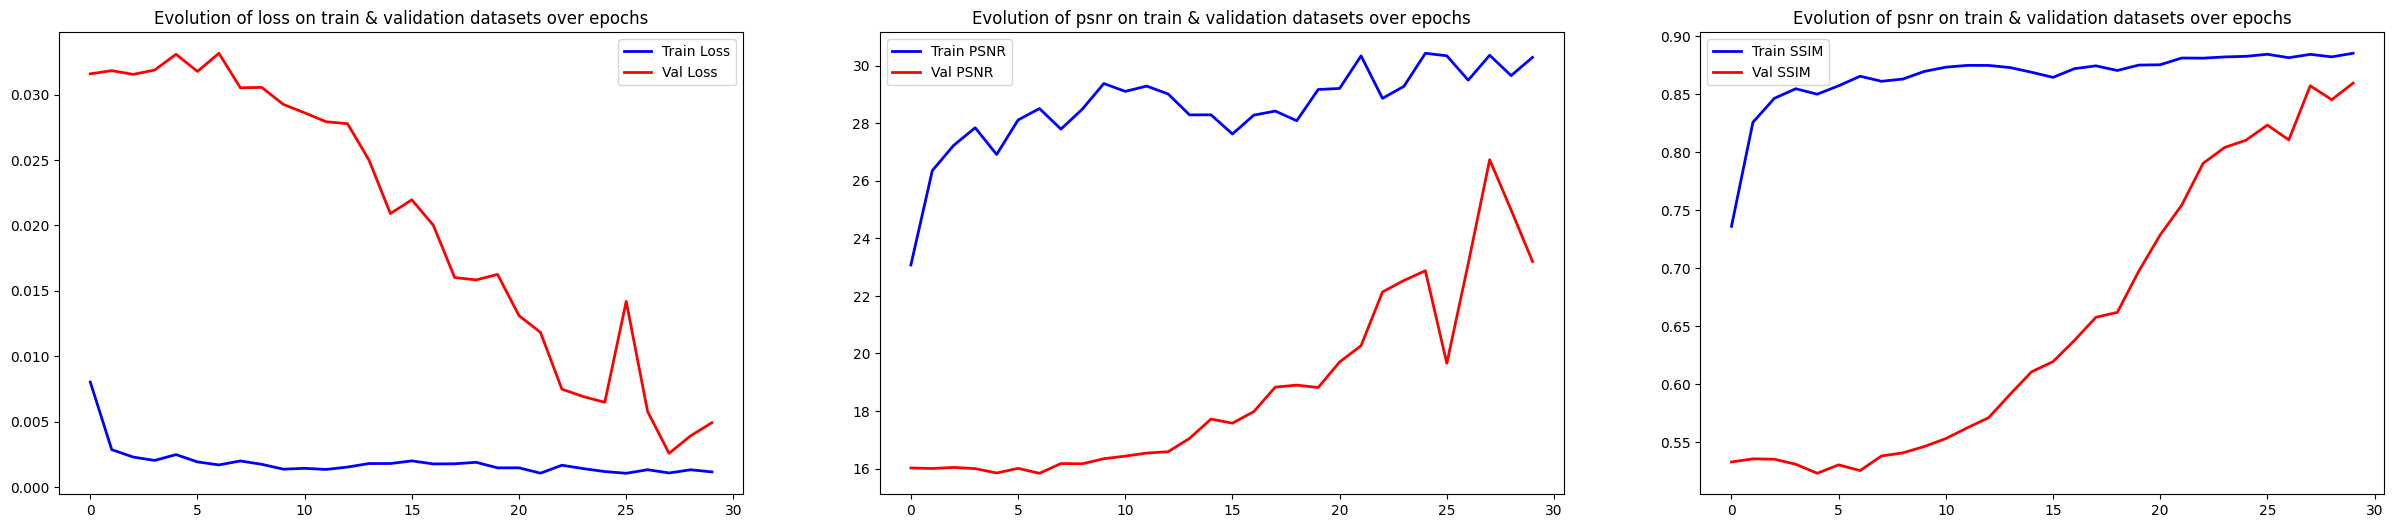

In [ ]:


epoch_loss = noise_denoise_history.history['loss']
epoch_val_loss = noise_denoise_history.history['val_loss']
"""epoch_mse = noise_denoise_history.history['mse']
epoch_val_mse = noise_denoise_history.history['val_mse']"""
epoch_psnr = noise_denoise_history.history['psnr']
epoch_val_psnr = noise_denoise_history.history['val_psnr']
epoch_ssim = noise_denoise_history.history['ssim']
epoch_val_ssim = noise_denoise_history.history['val_ssim']

plt.figure(figsize=(30,6))
plt.subplot(1,3,1)
plt.plot(range(0,len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Train Loss')
plt.plot(range(0,len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Val Loss')
plt.title('Evolution of loss on train & validation datasets over epochs')
plt.legend(loc='best')
#plt.savefig(path_str+'/loss',dpi=300)

"""plt.subplot(2,2,2)
plt.plot(range(0,len(epoch_mse)), epoch_mse, 'b-', linewidth=2, label='Train MAE')
plt.plot(range(0,len(epoch_val_mse)), epoch_val_mse, 'r-', linewidth=2,label='Val MAE')
plt.title('Evolution of MAE on train & validation datasets over epochs')
plt.legend(loc='best')
#plt.savefig(path_str+'/mae',dpi=300)"""



plt.subplot(1,3,2)
plt.plot(range(0,len(epoch_psnr)), epoch_psnr, 'b-', linewidth=2, label='Train PSNR')
plt.plot(range(0,len(epoch_val_psnr)), epoch_val_psnr, 'r-', linewidth=2,label='Val PSNR')
plt.title('Evolution of psnr on train & validation datasets over epochs')
plt.legend(loc='best')
#plt.savefig(path_str+'/psnr',dpi=300)


plt.subplot(1,3,3)
plt.plot(range(0,len(epoch_ssim)), epoch_ssim, 'b-', linewidth=2, label='Train SSIM')
plt.plot(range(0,len(epoch_val_ssim)), epoch_val_ssim, 'r-', linewidth=2,label='Val SSIM')
plt.title('Evolution of psnr on train & validation datasets over epochs')
plt.legend(loc='best')
plt.savefig(store_path+'output_ssim',dpi=300)

plt.show()

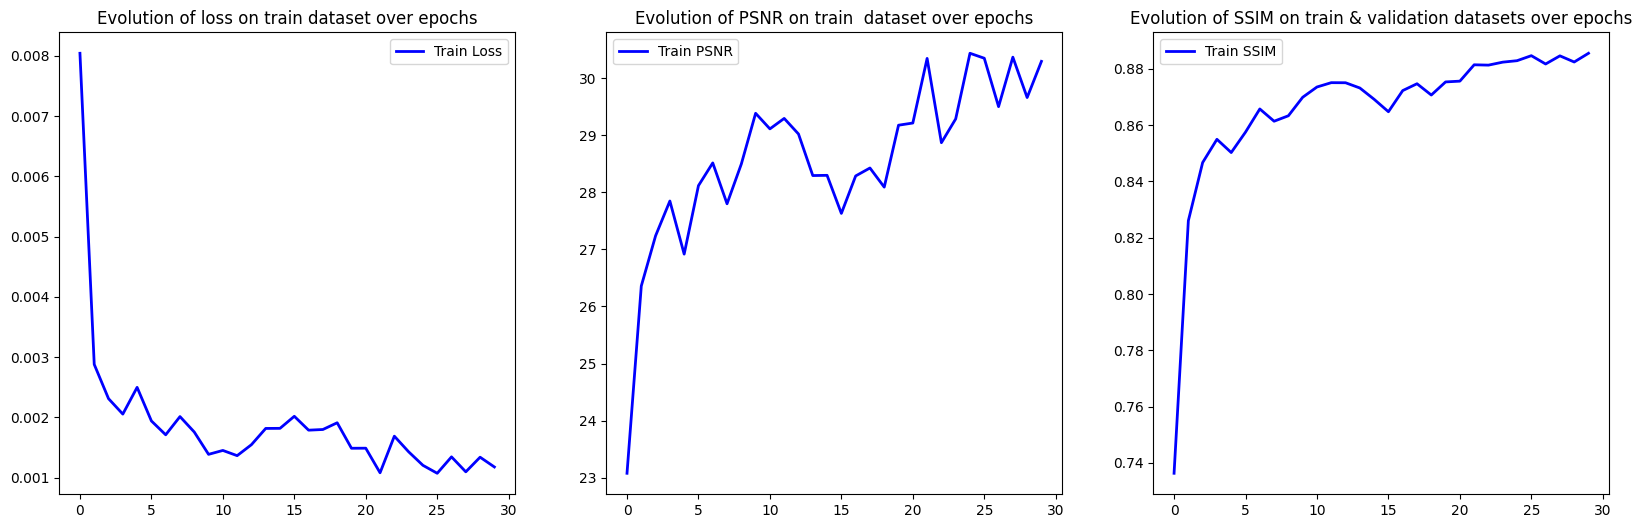

In [ ]:

epoch_loss = noise_denoise_history.history['loss']
epoch_val_loss = noise_denoise_history.history['val_loss']
"""epoch_mae = noise_denoise_history.history['mse']
epoch_val_mae = noise_denoise_history.history['val_mse']"""
epoch_psnr = noise_denoise_history.history['psnr']
epoch_val_psnr = noise_denoise_history.history['val_psnr']
epoch_ssim = noise_denoise_history.history['ssim']
epoch_val_ssim = noise_denoise_history.history['val_ssim']

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(range(0,len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Train Loss')
#plt.plot(range(0,len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Validation Loss')
plt.title('Evolution of loss on train dataset over epochs')
plt.legend(loc='best')
#plt.savefig(path_str+'/loss',dpi=300)

"""plt.subplot(2,2,2)
plt.plot(range(0,len(epoch_mae)), epoch_mae, 'b-', linewidth=2, label='Train MAE')
#plt.plot(range(0,len(epoch_val_mae)), epoch_val_mae, 'r-', linewidth=2,label='Validation MAE')
plt.title('Evolution of MAE on train  dataset over epochs')
plt.legend(loc='best')
#plt.savefig(path_str+'/mae',dpi=300)"""



plt.subplot(1,3,2)
plt.plot(range(0,len(epoch_psnr)), epoch_psnr, 'b-', linewidth=2, label='Train PSNR')
#plt.plot(range(0,len(epoch_val_mae)), epoch_val_psnr, 'r-', linewidth=2,label='Validation PSNR')
plt.title('Evolution of PSNR on train  dataset over epochs')
plt.legend(loc='best')
#plt.savefig(path_str+'/psnr',dpi=300)


plt.subplot(1,3,3)
plt.plot(range(0,len(epoch_ssim)), epoch_ssim, 'b-', linewidth=2, label='Train SSIM')
#plt.plot(range(0,len(epoch_val_mae)), epoch_val_ssim, 'r-', linewidth=2,label='Validation SSIM')
plt.title('Evolution of SSIM on train dataset over epochs')
plt.legend(loc='best')
plt.savefig(store_path+'output_ssim1',dpi=300)

plt.show()

In [ ]:
noisy_test = np.reshape(noisy_test, (len(noisy_test),noisy_test.shape[1], noisy_test.shape[2], 1))
clean_test = np.reshape(clean_test, (len(clean_test),noisy_test.shape[1], noisy_test.shape[2], 1))

In [ ]:
test_loss = model.evaluate(noisy_test,clean_test)

print('Test Loss:', test_loss)

15/15 [==============================] - 2s 163ms/step - loss: 0.0050 - psnr: 23.1590 - ssim: 0.8586 - enl: 12.6934
Test Loss: [0.004970747046172619, 23.158979415893555, 0.8585902452468872, 12.693353652954102]


In [ ]:
noisy_y_train_pred = model.predict(noisy_train)

25/25 [==============================] - 3s 127ms/step


In [ ]:
#J = imnoise(I,'speckle') adds multiplicative noise using the equation J = I+n*I, where n is uniformly distributed random noise with mean 0 and variance 0.05.

15/15 [==============================] - 2s 130ms/step
(784, 128, 128, 1)
(480, 128, 128, 1)


KeyboardInterrupt: ignored

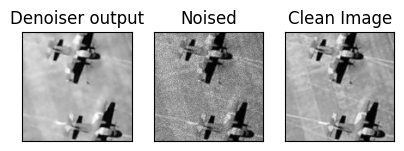

In [ ]:
import matplotlib.pyplot as plt

noisy_y_pred = model.predict(noisy_test)

#path_str="/content/drive/MyDrive/demonising_radar/simple-ae/set-12/poutput/"

print(clean_train.shape)
print(noisy_y_pred.shape)

noisy_y_pred *= 255
noisy_train *= 255
clean_train *= 255

fig, ax = plt.subplots(1, 3, figsize=(384/80, 128/80))

for i, (p_img, t_img, r_img) in enumerate(zip(noisy_y_pred, noisy_test, clean_test)):
    #p_img = cv2.resize(p_img, (128, 128))
    ax[0].imshow(p_img, cmap="gray")
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].set_title("Denoiser output")

    #t_img = cv2.resize(t_img, (128, 128))
    ax[1].imshow(t_img, cmap="gray")
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_title("Noised")

    #r_img = cv2.resize(r_img, (128, 128))
    ax[2].imshow(r_img, cmap="gray")
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    ax[2].set_title("Clean Image")

    plt.savefig(store_path+'train_model_out_'+str(i), dpi=300)

# Test dataset


In [ ]:
bench_y_path="/content/drive/MyDrive/demonising_radar/set12-dataset"
#bench_y_path="/content/drive/MyDrive/demonising_radar/berkley-dataset"
#bench_y_path="/content/drive/MyDrive/demonising_radar/denoising-iso"
#bench_y_path="/content/drive/MyDrive/demonising_radar/Denoising Dirty Document/train_cleaned"

In [ ]:
i=0
bench_X=[]

bench_noisy_images=[]
bench_clean_images=[]

print('Loading Images...')
bench_sorted_files = sorted(os.listdir(bench_y_path))

for each_file in bench_sorted_files[:30]:
  if os.path.exists(os.path.join(bench_y_path, each_file)) :

    print("path++++++++++++++++++",os.path.join(bench_y_path, each_file))
    y_img = cv2.imread(os.path.join(bench_y_path, each_file), 0)
    #y_img=cv2.resize(y_img,(img_spec_x,img_spec_x))
    #print(y_img.shape)

    y_img =crop_images(y_img)
    #img = add_speckle_noise_test(y_img,.05) # noise level 1
    img = add_speckle_noise_test(y_img,.1) #noise level2
    bench_X.append(img)
    bench_clean_images.append(y_img)







print('.....Complete....')

Loading Images...
path++++++++++++++++++ /content/drive/MyDrive/demonising_radar/set12-dataset/01.png
path++++++++++++++++++ /content/drive/MyDrive/demonising_radar/set12-dataset/02.png
path++++++++++++++++++ /content/drive/MyDrive/demonising_radar/set12-dataset/03.png
path++++++++++++++++++ /content/drive/MyDrive/demonising_radar/set12-dataset/04.png
path++++++++++++++++++ /content/drive/MyDrive/demonising_radar/set12-dataset/05.png
path++++++++++++++++++ /content/drive/MyDrive/demonising_radar/set12-dataset/06.png
path++++++++++++++++++ /content/drive/MyDrive/demonising_radar/set12-dataset/07.png
path++++++++++++++++++ /content/drive/MyDrive/demonising_radar/set12-dataset/08.png
path++++++++++++++++++ /content/drive/MyDrive/demonising_radar/set12-dataset/09.png
path++++++++++++++++++ /content/drive/MyDrive/demonising_radar/set12-dataset/10.png
path++++++++++++++++++ /content/drive/MyDrive/demonising_radar/set12-dataset/11.png
path++++++++++++++++++ /content/drive/MyDrive/demonising_r

In [ ]:
bench_X=np.array(bench_X)/255
bench_clean_images=np.array(bench_clean_images)/255
print(bench_X.shape)
print(bench_clean_images.shape)

(12, 128, 128)
(12, 128, 128)


In [ ]:
bench_X = np.reshape(bench_X, (len(bench_X),bench_X.shape[1], bench_X.shape[2], 1))
bench_clean_images = np.reshape(bench_clean_images, (len(bench_clean_images),bench_clean_images.shape[1], bench_clean_images.shape[2], 1))

In [ ]:
test_loss = model.evaluate(bench_X,bench_clean_images)
print('Test Loss:', test_loss)

1/1 [==============================] - 0s 128ms/step - loss: 0.0057 - psnr: 22.4805 - ssim: 0.8542 - enl: 5.9170
Test Loss: [0.005710342433303595, 22.48053550720215, 0.8541946411132812, 5.917046070098877]


In [ ]:
store_path='/content/drive/MyDrive/demonising_radar/noise-added-denoiser/simple-ae/'

store_path=store_path+'/set12/noiselevel2/'
#store_path=store_path+'/berkeley/noiselevel2/'
#store_path=store_path+'/iso/noiselevel2/'
#store_path=store_path+'/document/noiselevel2/'


1/1 [==============================] - 0s 41ms/step
0
1
2
3
4
5
6
7
8
9
10
11


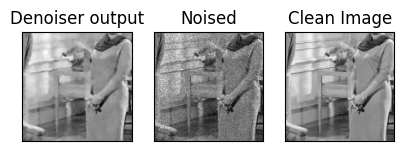

In [ ]:
bench_noisy_y_pred = model.predict(bench_X)




bench_noisy_y_pred *= 255
"""
bench_X *= 255
bench_clean_images *= 255"""


fig, ax = plt.subplots(1, 3, figsize=(384/80, 128/80))

for i, (p_img, t_img, r_img) in enumerate(zip(bench_noisy_y_pred, bench_X, bench_clean_images)):
    #p_img = cv2.resize(p_img, (img_spec_x, img_spec_y))
    ax[0].imshow(p_img, cmap="gray")
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].set_title("Denoiser output")

    #t_img = cv2.resize(t_img, (img_spec_x, img_spec_y))
    ax[1].imshow(t_img, cmap="gray")
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_title("Noised")

    #r_img = cv2.resize(r_img, (img_spec_x, img_spec_y))
    ax[2].imshow(r_img, cmap="gray")
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    ax[2].set_title("Clean Image")

    print(i)

    plt.savefig(store_path+'model_out_'+str(i), dpi=300)




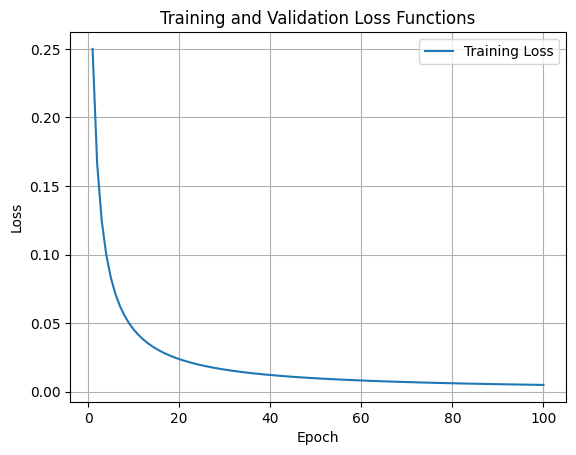

In [ ]:

import matplotlib.pyplot as plt

# Example loss values (replace with your own data)
epochs = [i for i in range(1, 101)]  # 100 epochs
train_loss = [0.5 / (epoch + 1) for epoch in epochs]  # Example decreasing training loss values
val_loss = [0.9 / (epoch + 1) for epoch in epochs]  # Example decreasing validation loss values

# Create a figure and axis objects
fig, ax = plt.subplots()

# Plot the training and validation loss functions
ax.plot(epochs, train_loss, label='Training Loss')
#ax.plot(epochs, val_loss, label='Validation Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Training and Validation Loss Functions')
ax.legend()  # Show legend with labels
ax.grid(True)

# Show the plot
plt.show()